In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
import seaborn as sns
import math
from scipy import optimize
from tqdm import tqdm
from dataclasses import dataclass
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
bank = pd.read_csv('bank/bank-full.csv', sep = ';')

In [3]:
bank

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

## EDA

In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64


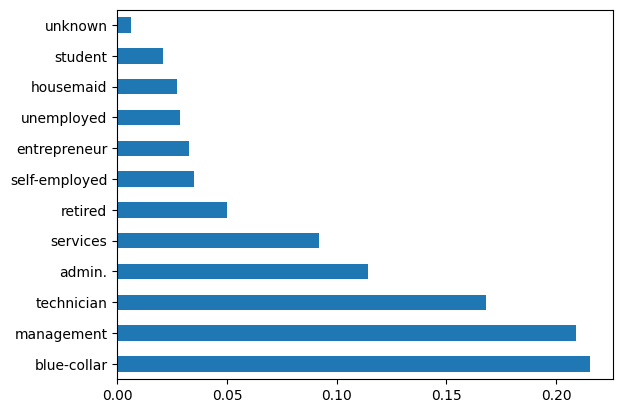

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64


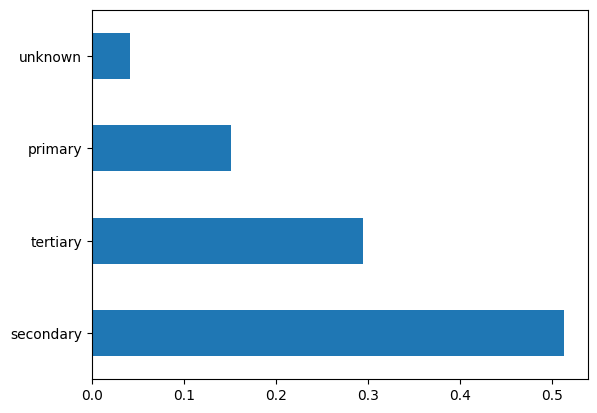

               age   balance  duration  campaign     pdays
age       1.000000  0.097783 -0.004648  0.004760 -0.023758
balance   0.097783  1.000000  0.021560 -0.014578  0.003435
duration -0.004648  0.021560  1.000000 -0.084570 -0.001565
campaign  0.004760 -0.014578 -0.084570  1.000000 -0.088628
pdays    -0.023758  0.003435 -0.001565 -0.088628  1.000000


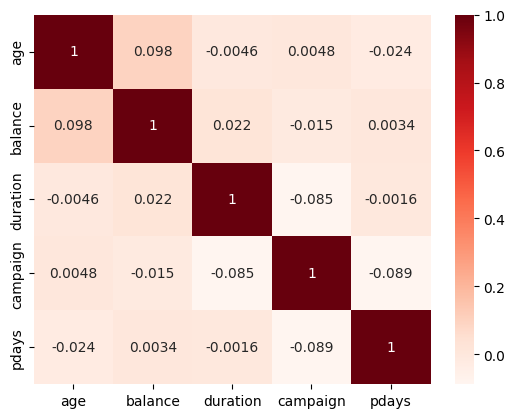

In [5]:
# EDA
## Check Missing Value
bank.isnull().sum()
# calculate the percentage of job category
percent_job = bank.job.value_counts(normalize = True)
print(percent_job)
# plot 
percent_job.plot.barh()
plt.show()
# Calculate the education category
percent_edu = bank.education.value_counts(normalize = True)
print(percent_edu)
# Plot
percent_edu.plot.barh()
plt.show()
# Correlation a matrix using age, marital, default, housing, loan, balance, duration, campaign, pdays, y
cor = bank[['age', 'balance', 'duration', 'campaign', 'pdays']].corr()
print(cor)
# Correlation Plot
sns.heatmap(cor, annot = True, cmap = 'Reds')
plt.show()

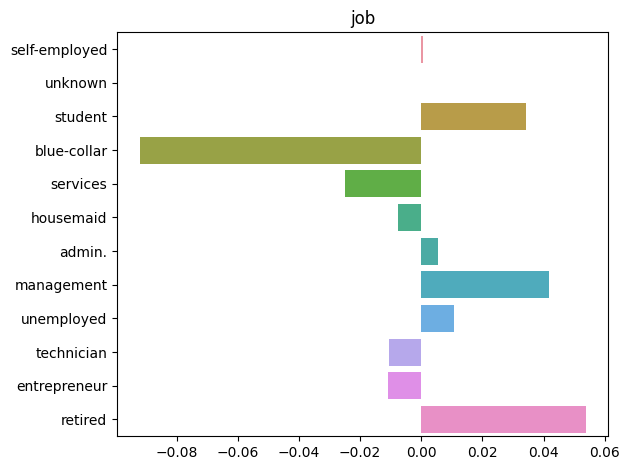

In [6]:
# Normalized distribution of each class per feature and plotted difference between positive and negative frequence
feature = 'job'
def norm_dist(feature):
    
    pos_count = bank.loc[bank.y.values == 'yes', feature].value_counts()
    neg_count = bank.loc[bank.y.values == 'no', feature].value_counts()
    all_count = list(set(list(pos_count.index) + list(neg_count.index)))

# Count the frequence 
    pos_freq = (bank.y.values == 'yes').sum()
    neg_freq = (bank.y.values == 'no').sum()

    pos_count = pos_count.to_dict()
    neg_count = neg_count.to_dict()
    all_index = list(all_count)

    all_count = [pos_count.get(k,0) / pos_freq - neg_count.get(k, 0)/neg_freq for k in all_count]

    sns.barplot(x=all_count, y=all_index).set(title=feature)
    plt.tight_layout()
norm_dist(feature)

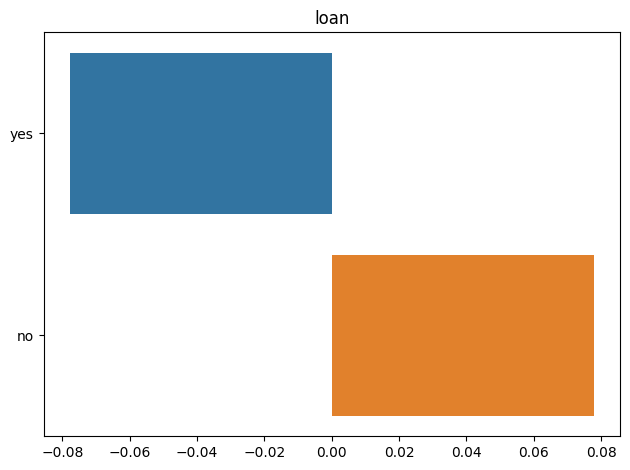

In [7]:
norm_dist('loan')
# people who have taken a loan are more likely to refuse suscribe.

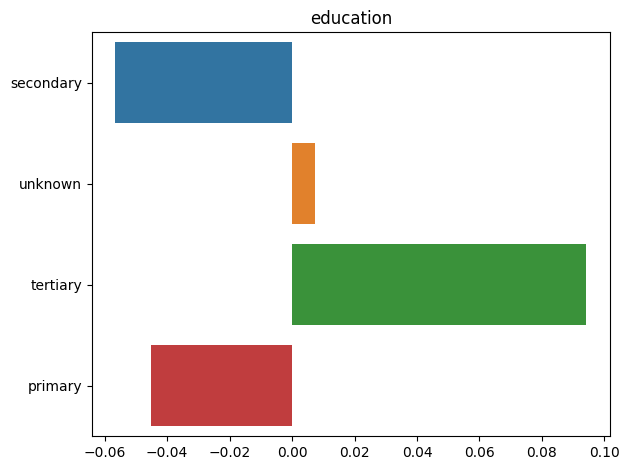

In [8]:
norm_dist('education')
# people who have tertiary education are more likely to refuse suscribe.

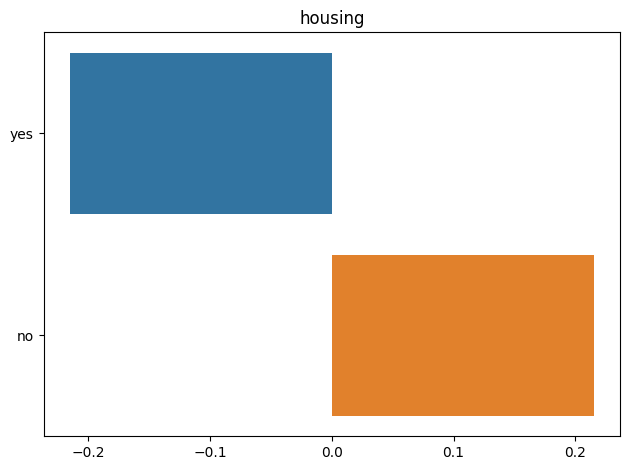

In [9]:
norm_dist('housing')
# people who have a house are more likely to refuse suscribe.

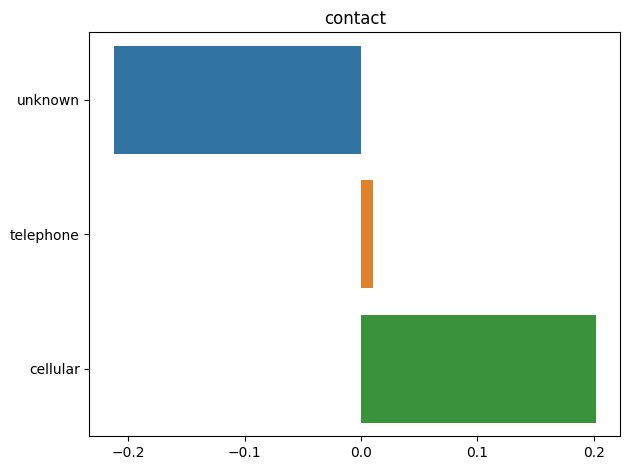

In [10]:
norm_dist('contact')
# people who have cellular are more likely to refuse suscribe.

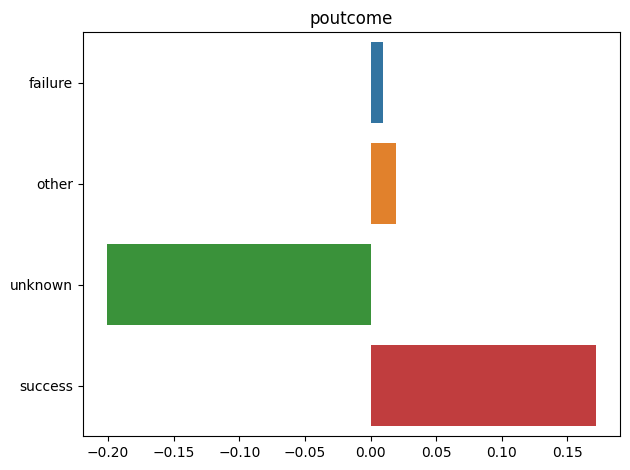

In [11]:
norm_dist('poutcome')
# people who success in poutcome are more likely to refuse suscribe.

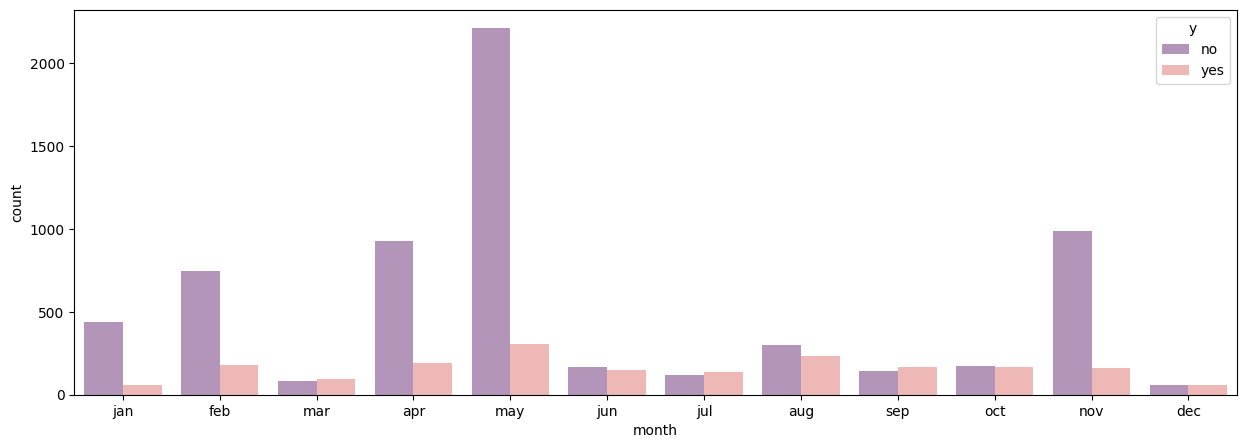

In [402]:
# general distribution of the popularity of articles 
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='month', data=bank,alpha=0.5, hue='y',palette = 'magma', 
                   order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

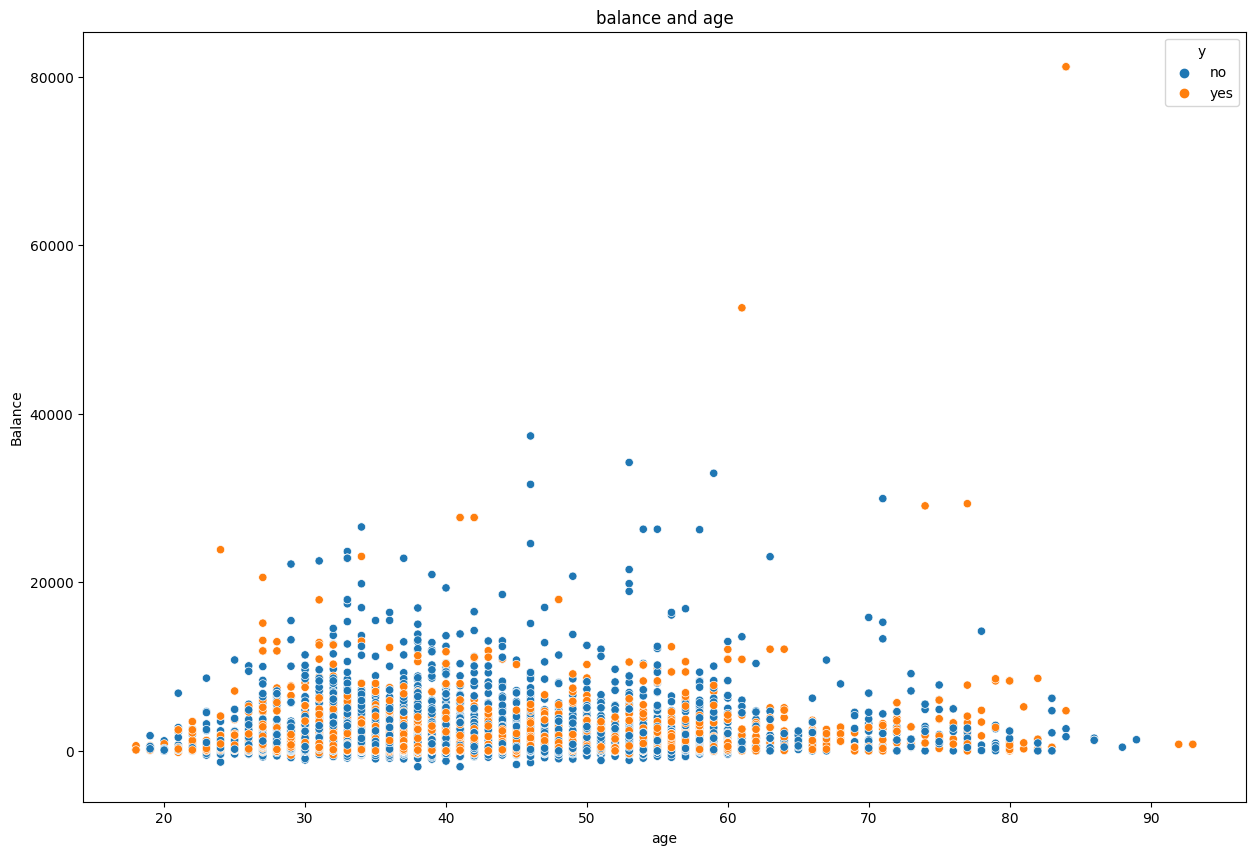

In [479]:
#Creating plots
fig, axes = plt.subplots(figsize=(15,10))
ax = sns.scatterplot(data=bank, x="age", y="balance", hue='y')
plt.title('balance and age')
plt.xlabel('age')
plt.ylabel('Balance') 
# Show the plot
plt.show()

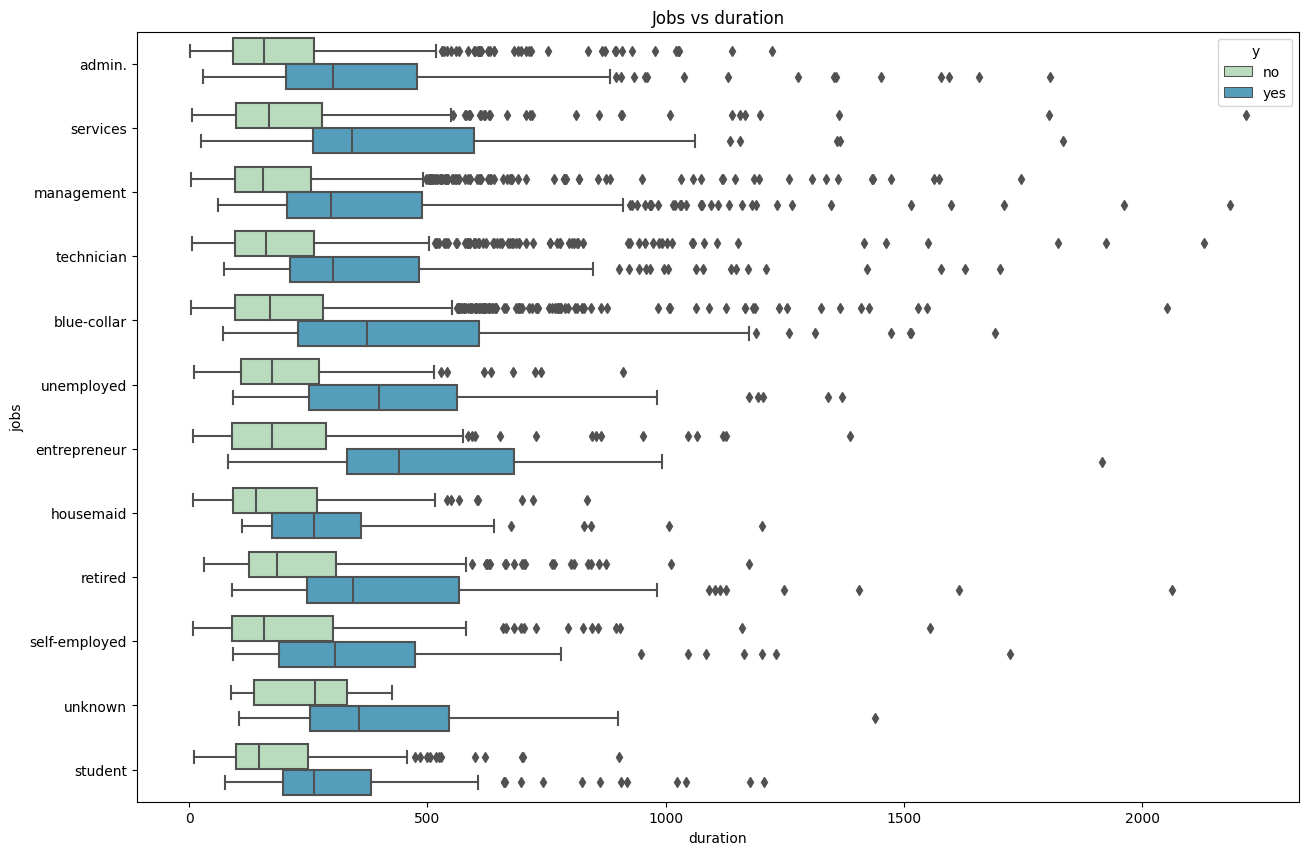

In [478]:
#Reading the dataset
# bill_dataframe = sns.load_dataset("tips")
#Creating boxplots
fig, axes = plt.subplots(figsize=(15,10))
ax = sns.boxplot(data=bank, x="duration", y="job",hue='y',palette="GnBu")
#Adding the aesthetics
plt.title('Jobs vs duration')
plt.xlabel('duration')
plt.ylabel('jobs') 
# Show the plot
plt.show()

In [12]:
# correlation between job and bank 
pd.crosstab(bank.job, bank.education)

education      primary  secondary  tertiary  unknown
job                                                 
admin.             209       4219       572      171
blue-collar       3758       5371       149      454
entrepreneur       183        542       686       76
housemaid          627        395       173       45
management         294       1121      7801      242
retired            795        984       366      119
self-employed      130        577       833       39
services           345       3457       202      150
student             44        508       223      163
technician         158       5229      1968      242
unemployed         257        728       289       29
unknown             51         71        39      127

In [13]:
percent_po = bank.poutcome.value_counts(normalize = True)
print(percent_po)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64


In [14]:
# correlation between job and bank 
pd.crosstab(bank.job, bank.education)

# Replace unknow value
bank.loc[(bank['age'] > 60) & (bank['job'] == 'unknown'), 'job'] = 'retired'
bank.loc[(bank['education'] == 'unknown') & (bank['job'] == 'admin.'), 'education'] = 'secondary'
bank.loc[(bank['education'] == 'unknown') & (bank['job'] == 'blue-collar'), 'education'] = 'secondary'
bank.loc[(bank['education'] == 'unknown') & (bank['job'] == 'entrepreneur'), 'education'] = 'tertiary'
bank.loc[(bank['education'] == 'unknown') & (bank['job'] == 'housemaid'), 'education'] = 'primary'
bank.loc[(bank['education'] == 'unknown') & (bank['job'] == 'management'), 'education'] = 'tertiary'
bank.loc[(bank['education'] == 'unknown') & (bank['job'] == 'retired'), 'education'] = 'secondary'
bank.loc[(bank['education'] == 'unknown') & (bank['job'] == 'self-employed'), 'education'] = 'tertiary'
bank.loc[(bank['education'] == 'unknown') & (bank['job'] == 'services'), 'education'] = 'secondary'
bank.loc[(bank['education'] == 'unknown') & (bank['job'] == 'student'), 'education'] = 'secondary'
bank.loc[(bank['education'] == 'unknown') & (bank['job'] == 'technician'), 'education'] = 'secondary'
bank.loc[(bank['education'] == 'unknown') & (bank['job'] == 'unemployed'), 'education'] = 'secondary'

# Delete unknown value in poutcome
bank = bank[bank.poutcome != 'unknown']
# bank = bank.drop('poutcome', axis = 1)
bank

age           job  marital  education default  balance housing loan  \
24060   33        admin.  married   tertiary      no      882      no   no   
24062   42        admin.   single  secondary      no     -247     yes  yes   
24064   33      services  married  secondary      no     3444     yes   no   
24072   36    management  married   tertiary      no     2415     yes   no   
24077   36    management  married   tertiary      no        0     yes   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45199   34   blue-collar   single  secondary      no     1475     yes   no   
45201   53    management  married   tertiary      no      583      no   no   
45204   73       retired  married  secondary      no     2850      no   no   
45208   72       retired  married  secondary      no     5715      no   no   
45210   37  entrepreneur  married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
24060  telephone   21   oct        39         1    151         3  failure   no  
24062  telephone   21   oct       519         1    166         1    other  yes  
24064  telephone   21   oct       144         1     91         4  failure  yes  
24072  telephone   22   oct        73         1     86         4    other   no  
24077  telephone   23   oct       140         1    143         3  failure  yes  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45199   cellular   16   nov      1166         3    530        12    other   no  
45201   cellular   17   nov       226         1    184         4  success  yes  
45204   cellular   17   nov       300         1     40         8  failure  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45210   cellular   17   nov       361         2    188        11    other   no  

[8252 rows x 17 columns]

In [15]:
bank_y = bank['y'].map({'yes': 1,'no': 0})

In [16]:
bank_y = pd.DataFrame(bank_y)
bank_y

y
24060  0
24062  1
24064  1
24072  0
24077  1
...   ..
45199  0
45201  1
45204  1
45208  1
45210  0

[8252 rows x 1 columns]

In [17]:
bank_y = bank_y.reset_index(drop=True)

In [18]:
bank1 = bank.drop('y', 1)
bank1

/var/folders/5m/b1nnfd2916z906z1wgpls23r0000gn/T/ipykernel_41394/2316371171.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bank1 = bank.drop('y', 1)


age           job  marital  education default  balance housing loan  \
24060   33        admin.  married   tertiary      no      882      no   no   
24062   42        admin.   single  secondary      no     -247     yes  yes   
24064   33      services  married  secondary      no     3444     yes   no   
24072   36    management  married   tertiary      no     2415     yes   no   
24077   36    management  married   tertiary      no        0     yes   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45199   34   blue-collar   single  secondary      no     1475     yes   no   
45201   53    management  married   tertiary      no      583      no   no   
45204   73       retired  married  secondary      no     2850      no   no   
45208   72       retired  married  secondary      no     5715      no   no   
45210   37  entrepreneur  married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  
24060  telephone   21   oct        39         1    151         3  failure  
24062  telephone   21   oct       519         1    166         1    other  
24064  telephone   21   oct       144         1     91         4  failure  
24072  telephone   22   oct        73         1     86         4    other  
24077  telephone   23   oct       140         1    143         3  failure  
...          ...  ...   ...       ...       ...    ...       ...      ...  
45199   cellular   16   nov      1166         3    530        12    other  
45201   cellular   17   nov       226         1    184         4  success  
45204   cellular   17   nov       300         1     40         8  failure  
45208   cellular   17   nov      1127         5    184         3  success  
45210   cellular   17   nov       361         2    188        11    other  

[8252 rows x 16 columns]

In [19]:
# Convert categorical to numeric
bank1['poutcome'] = bank1['poutcome'].replace(['failure', 'other','success'],[-1, 0, 1])
bank1['default'] = bank1['default'].replace(['no', 'yes'],[0, 1])
bank1['housing'] = bank1['housing'].replace(['no', 'yes'],[0, 1])
bank1['loan'] = bank1['loan'].replace(['no','yes'],[0, 1])

# add dummy variable
nominal = ['job','marital','education','contact','month']
bank1 = pd.get_dummies(bank1,columns=nominal)

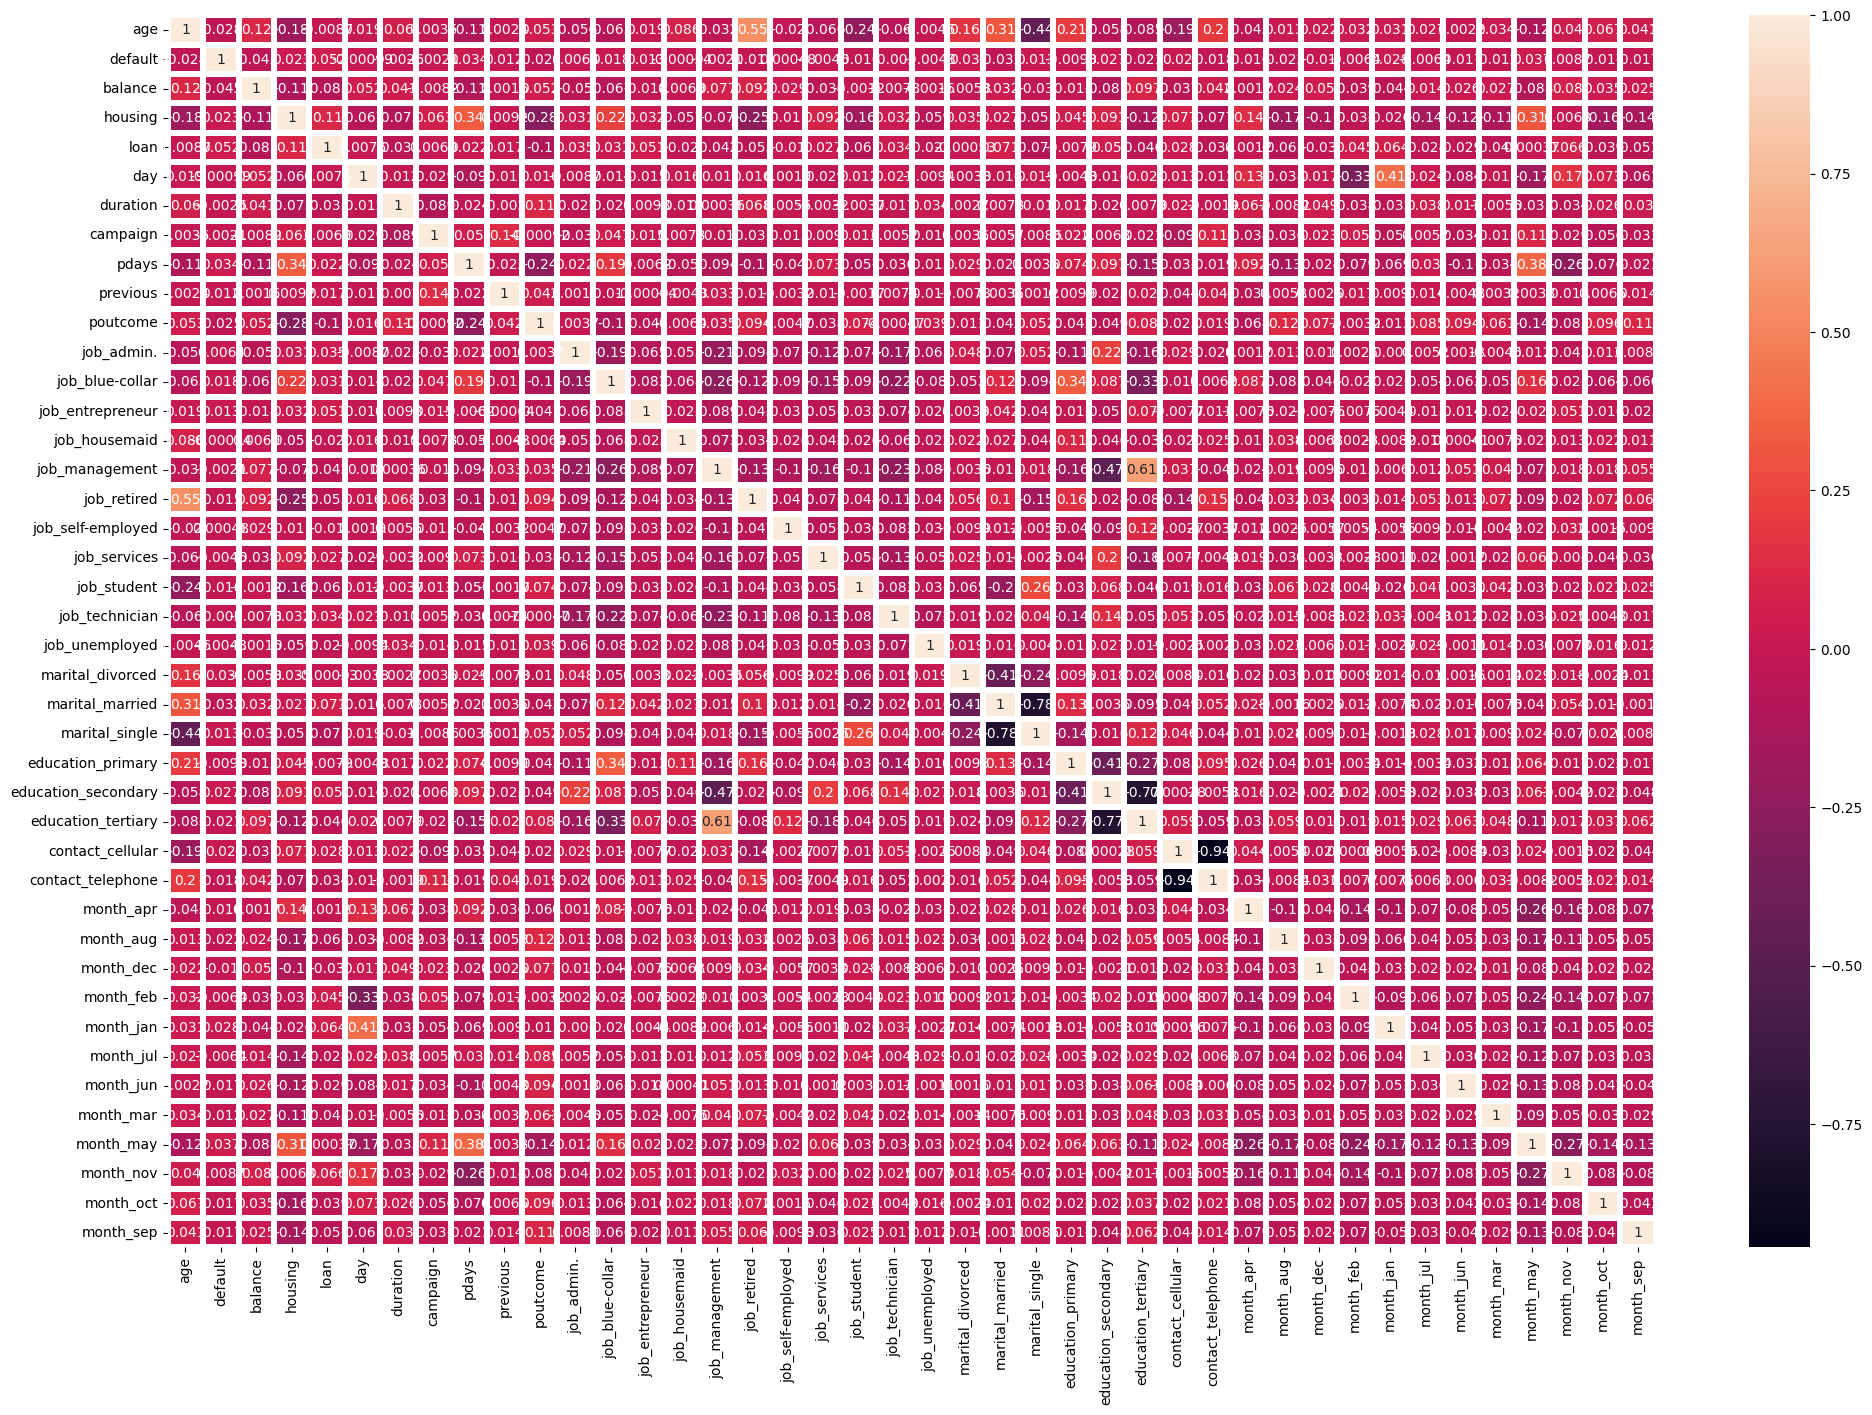

In [20]:
# Drop unknown dummies
bank1 = bank1.drop(labels = ['job_unknown', 'contact_unknown', 'education_unknown'], axis =1)

# Correlationship 
bank1.corr()

# Heatmap for corr
plt.figure(figsize = (24,16))
ax = sns.heatmap(bank1.corr(), annot=True, linewidths=3)

In [21]:
from sklearn import preprocessing
x = bank1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=bank1.columns)

In [491]:
bank1

age  default  balance  housing  loan  day  duration  campaign  pdays  \
24060   33        0      882        0     0   21        39         1    151   
24062   42        0     -247        1     1   21       519         1    166   
24064   33        0     3444        1     0   21       144         1     91   
24072   36        0     2415        1     0   22        73         1     86   
24077   36        0        0        1     0   23       140         1    143   
...    ...      ...      ...      ...   ...  ...       ...       ...    ...   
45199   34        0     1475        1     0   16      1166         3    530   
45201   53        0      583        0     0   17       226         1    184   
45204   73        0     2850        0     0   17       300         1     40   
45208   72        0     5715        0     0   17      1127         5    184   
45210   37        0     2971        0     0   17       361         2    188   

       previous  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
24060         3  ...          0          0          0          0          0   
24062         1  ...          0          0          0          0          0   
24064         4  ...          0          0          0          0          0   
24072         4  ...          0          0          0          0          0   
24077         3  ...          0          0          0          0          0   
...         ...  ...        ...        ...        ...        ...        ...   
45199        12  ...          0          0          0          0          0   
45201         4  ...          0          0          0          0          0   
45204         8  ...          0          0          0          0          0   
45208         3  ...          0          0          0          0          0   
45210        11  ...          0          0          0          0          0   

       month_mar  month_may  month_nov  month_oct  month_sep  
24060          0          0          0          1          0  
24062          0          0          0          1          0  
24064          0          0          0          1          0  
24072          0          0          0          1          0  
24077          0          0          0          1          0  
...          ...        ...        ...        ...        ...  
45199          0          0          1          0          0  
45201          0          0          1          0          0  
45204          0          0          1          0          0  
45208          0          0          1          0          0  
45210          0          0          1          0          0  

[8252 rows x 42 columns]

In [24]:
df['y'] = bank_y
df

age  default   balance  housing  loan       day  duration  \
0     0.200000      0.0  0.033290      0.0   0.0  0.666667  0.017133   
1     0.320000      0.0  0.019702      1.0   1.0  0.666667  0.233544   
2     0.200000      0.0  0.064125      1.0   0.0  0.666667  0.064472   
3     0.240000      0.0  0.051740      1.0   0.0  0.700000  0.032462   
4     0.240000      0.0  0.022675      1.0   0.0  0.733333  0.062669   
...        ...      ...       ...      ...   ...       ...       ...   
8247  0.213333      0.0  0.040427      1.0   0.0  0.500000  0.525248   
8248  0.466667      0.0  0.029691      0.0   0.0  0.533333  0.101443   
8249  0.733333      0.0  0.056976      0.0   0.0  0.533333  0.134806   
8250  0.720000      0.0  0.091457      0.0   0.0  0.533333  0.507665   
8251  0.253333      0.0  0.058432      0.0   0.0  0.533333  0.162308   

      campaign     pdays  previous  ...  month_feb  month_jan  month_jul  \
0     0.000000  0.172414  0.007299  ...        0.0        0.0        0.0   
1     0.000000  0.189655  0.000000  ...        0.0        0.0        0.0   
2     0.000000  0.103448  0.010949  ...        0.0        0.0        0.0   
3     0.000000  0.097701  0.010949  ...        0.0        0.0        0.0   
4     0.000000  0.163218  0.007299  ...        0.0        0.0        0.0   
...        ...       ...       ...  ...        ...        ...        ...   
8247  0.133333  0.608046  0.040146  ...        0.0        0.0        0.0   
8248  0.000000  0.210345  0.010949  ...        0.0        0.0        0.0   
8249  0.000000  0.044828  0.025547  ...        0.0        0.0        0.0   
8250  0.266667  0.210345  0.007299  ...        0.0        0.0        0.0   
8251  0.066667  0.214943  0.036496  ...        0.0        0.0        0.0   

      month_jun  month_mar  month_may  month_nov  month_oct  month_sep  y  
0           0.0        0.0        0.0        0.0        1.0        0.0  0  
1           0.0        0.0        0.0        0.0        1.0        0.0  1  
2           0.0        0.0        0.0        0.0        1.0        0.0  1  
3           0.0        0.0        0.0        0.0        1.0        0.0  0  
4           0.0        0.0        0.0        0.0        1.0        0.0  1  
...         ...        ...        ...        ...        ...        ... ..  
8247        0.0        0.0        0.0        1.0        0.0        0.0  0  
8248        0.0        0.0        0.0        1.0        0.0        0.0  1  
8249        0.0        0.0        0.0        1.0        0.0        0.0  1  
8250        0.0        0.0        0.0        1.0        0.0        0.0  1  
8251        0.0        0.0        0.0        1.0        0.0        0.0  0  

[8252 rows x 43 columns]

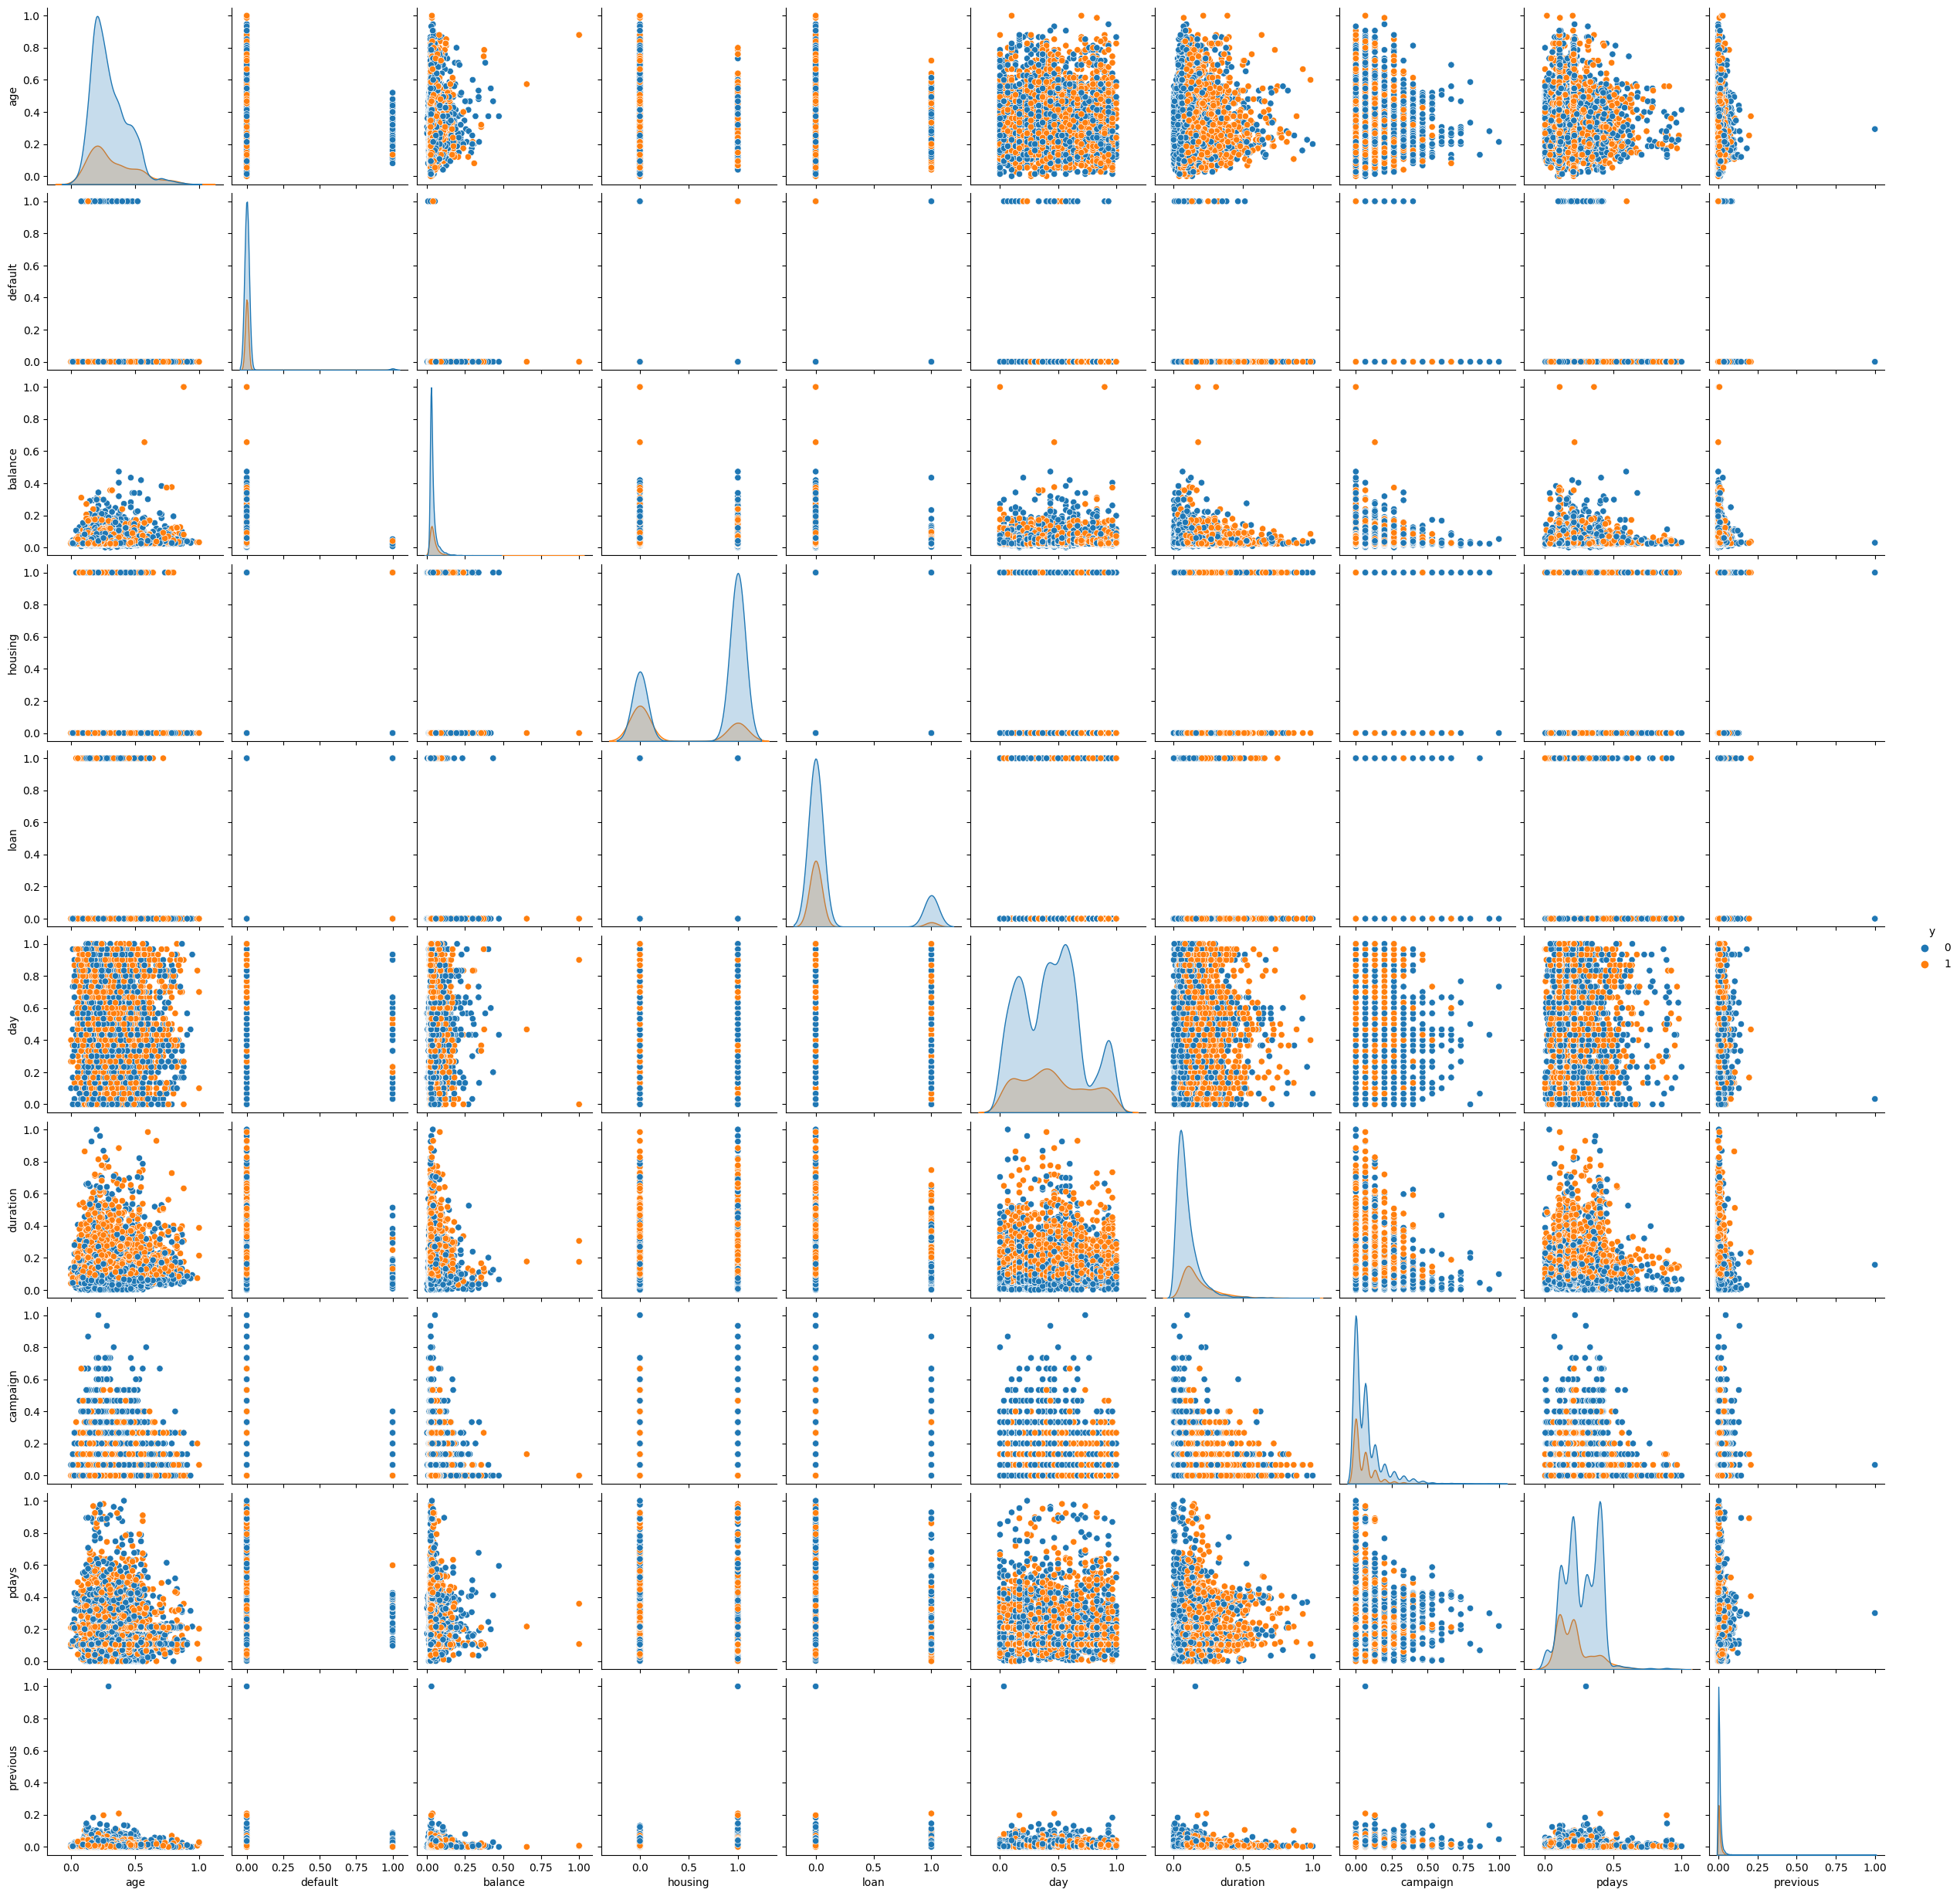

In [492]:
kw_cols = ['age','default','balance','housing','loan','day','duration','campaign','pdays','previous']
sns.pairplot(df, vars=kw_cols, hue='y', diag_kind='kde')

## PCA

/var/folders/5m/b1nnfd2916z906z1wgpls23r0000gn/T/ipykernel_41394/1995234256.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bank_clean_var = df.drop('y', 1)


Text(0.5, 0, 'Dimensions')

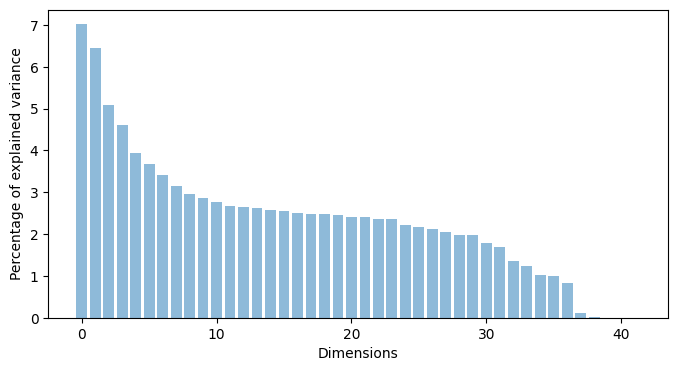

In [25]:
# PCA
## Standardized
bank_y = df['y'].tolist()
bank_clean_var = df.drop('y', 1)
standardized_bank_clean = (bank_clean_var - np.average(bank_clean_var)) / (np.std(bank_clean_var))
## correlation matrix
standardized_bank_clean_corr = standardized_bank_clean.corr()
## eigen vlaues & eigen vectors
u,s,v = np.linalg.svd(standardized_bank_clean_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
## 
np.sum(eig_values)

# plotting the variance explained by each PC 
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(0,len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')
## The first 4 dimensions will be enough to represent the data

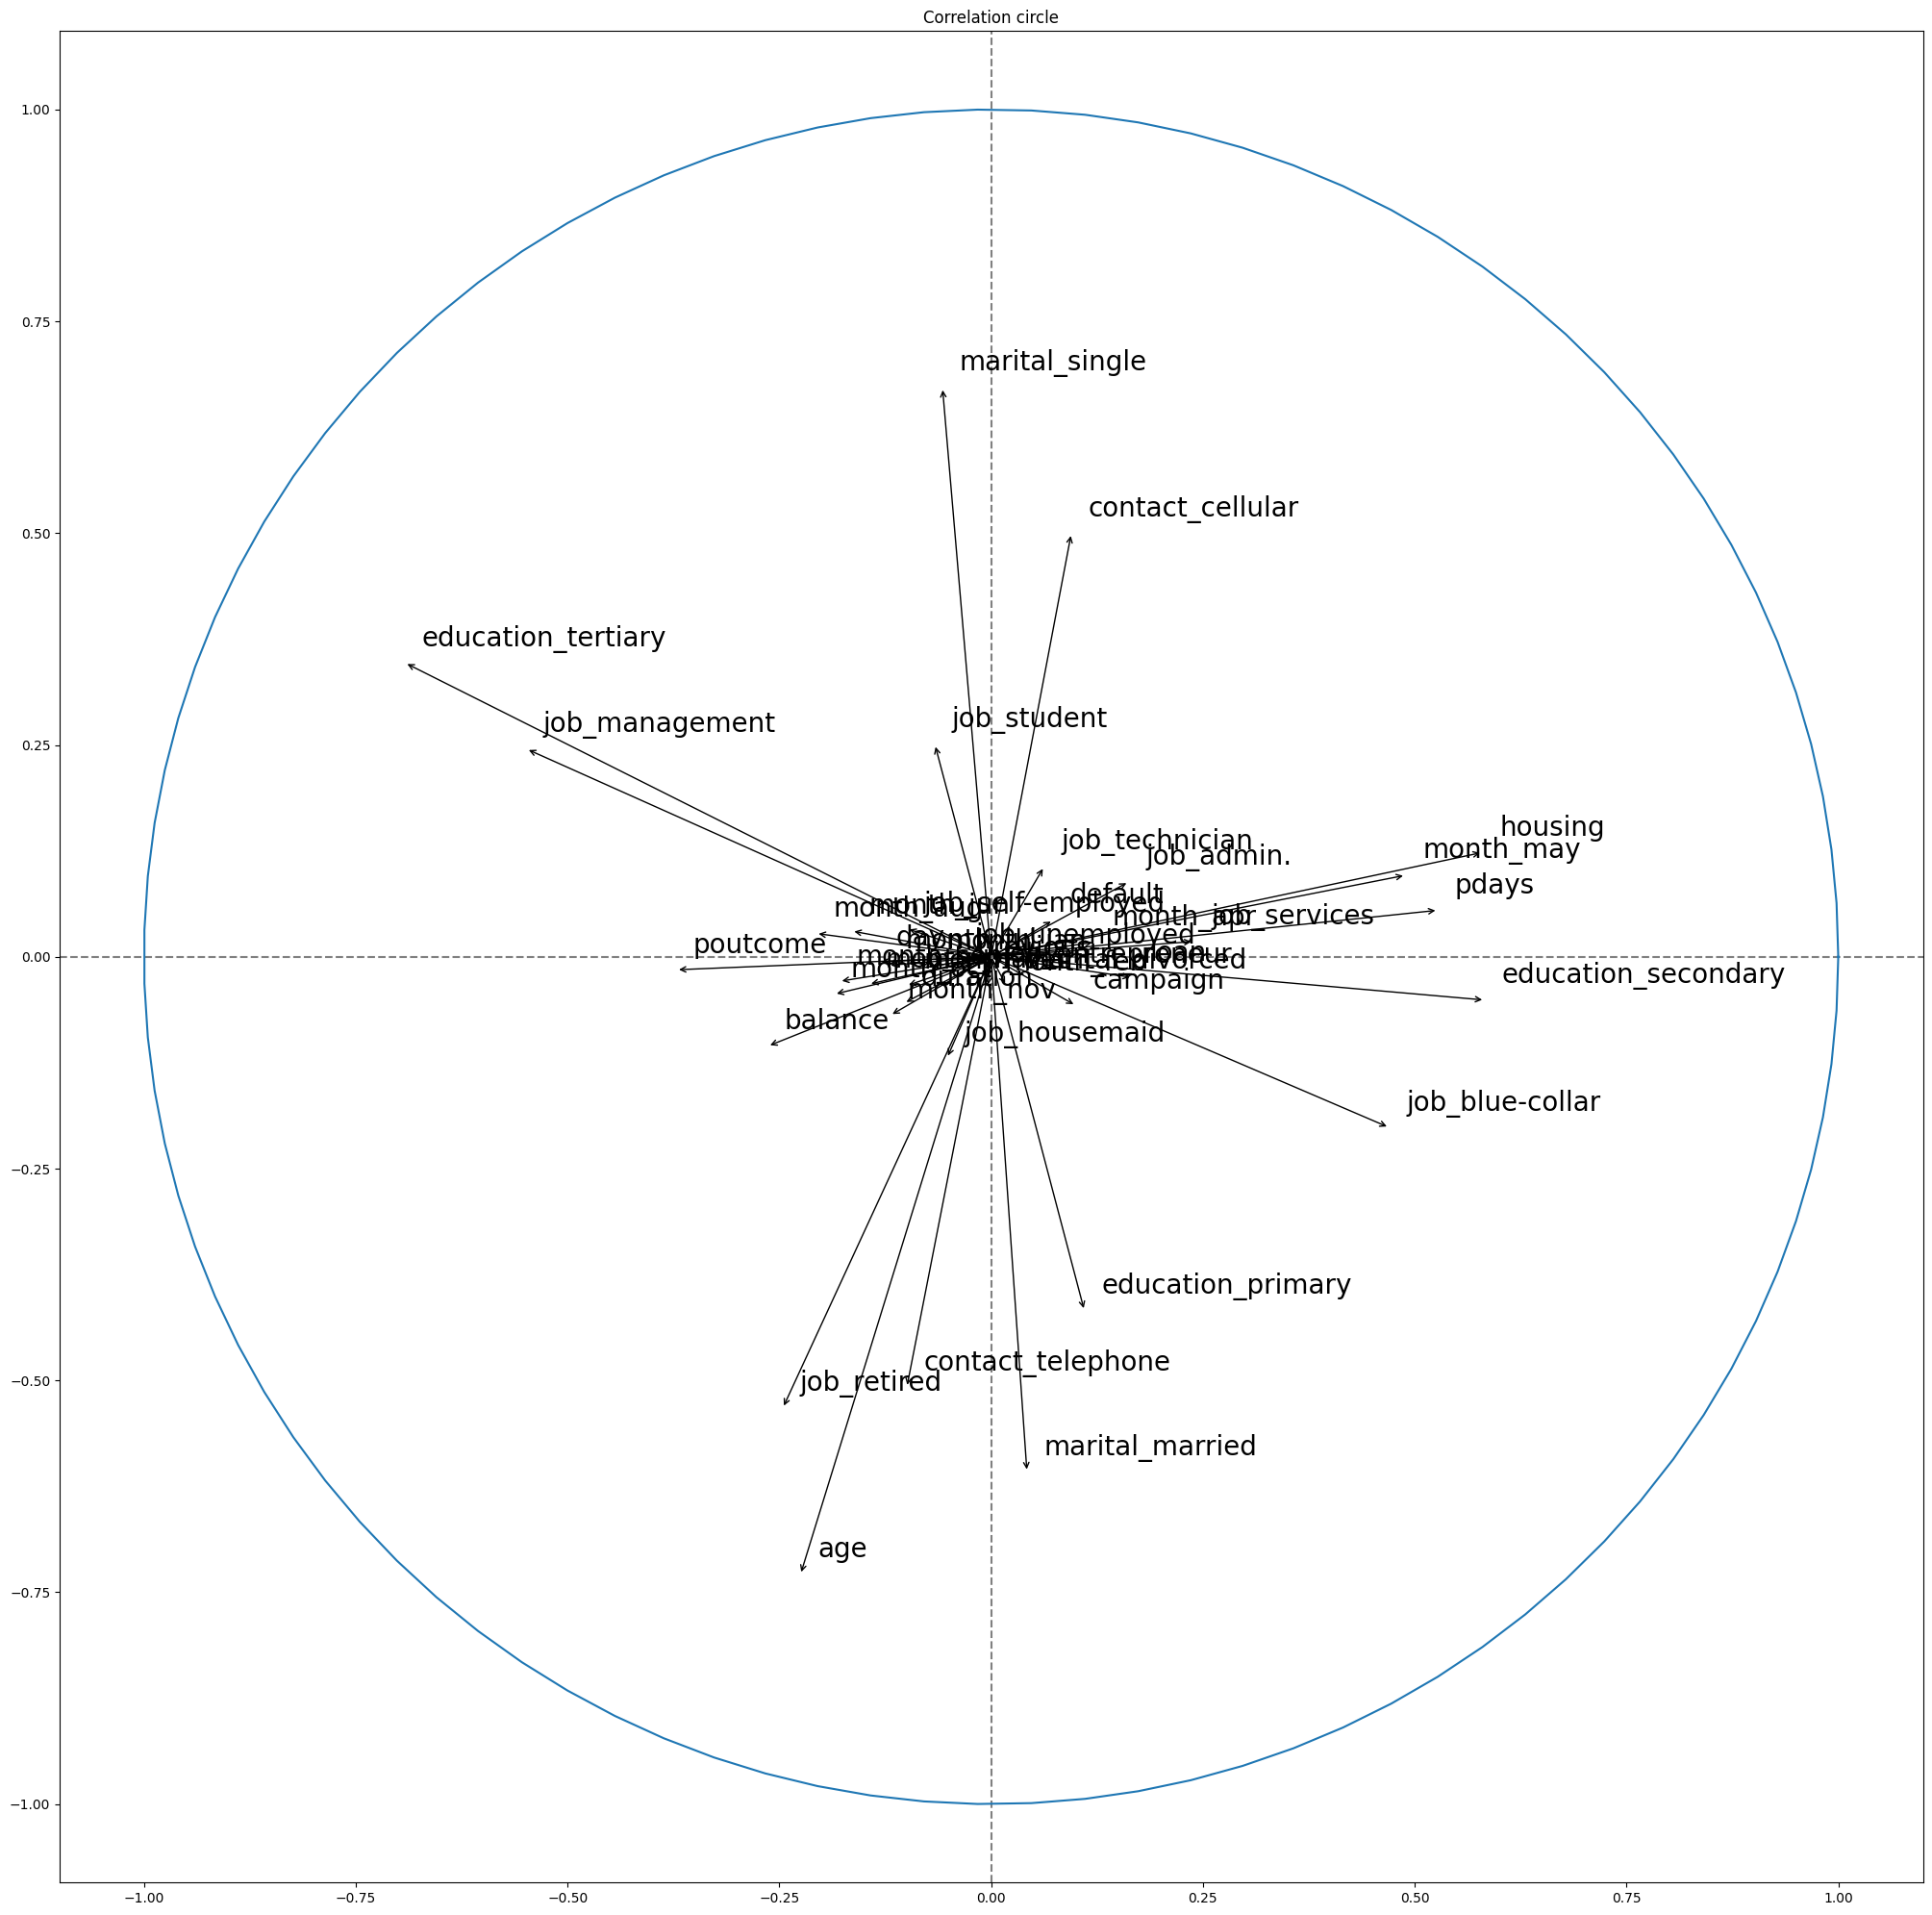

In [26]:
# calculating our new axis
pc1 = standardized_bank_clean.dot(eig_vectors[:,0])
pc2 = standardized_bank_clean.dot(eig_vectors[:,1])

# Correlation circle
def plot_correlation_circle(pc1, pc2):    
    fig, ax = plt.subplots(figsize=(25, 25))

    for i in range(bank_clean_var.shape[1]):
        x = np.corrcoef(pc1,bank_clean_var[bank_clean_var.columns[i]])[0,1]
        y = np.corrcoef(pc2,bank_clean_var[bank_clean_var.columns[i]])[0,1]
        ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
        ax.annotate(bank_clean_var.columns[i], (x+0.02,y+0.02), size=20)


    ax.set_title('Correlation circle')
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show()
    
plot_correlation_circle(pc1,pc2)

In [27]:
## PCA function
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [28]:
standardized_bank_clean.shape

(8252, 42)

In [29]:
#prepare the data
x = standardized_bank_clean
 
#prepare the target
target = df['y'].map({1: 'yes',0: 'no'})

#Applying it to PCA function
mat_reduced = PCA(x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
b = pd.DataFrame(target)
b = b.reset_index().drop(['index'], axis=1)
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , b] , axis = 1)

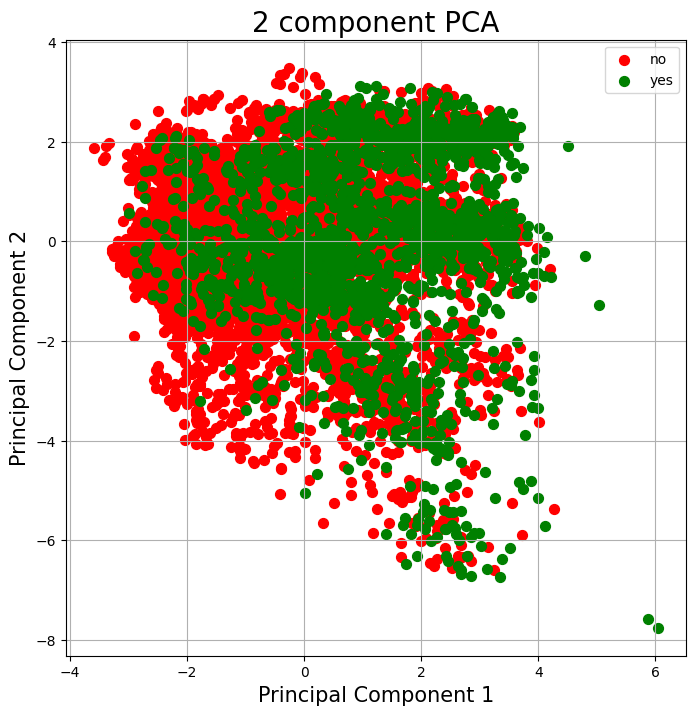

In [484]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['no', 'yes']
color = ['r', 'b']
for targett, color in zip(targets,colors):
    indicesToKeep = principal_df['y'] == targett
    ax.scatter(principal_df.loc[indicesToKeep, 'PC1'], 
               principal_df.loc[indicesToKeep, 'PC2']
               , c = color, s = 50)
ax.legend(targets)
ax.grid()

In [31]:
# Get new Bank data after PCA
# def pca(df, k):
#     mean = np.mean(df, axis=0)
#     new_df = df - mean
#     cov = np.cov(new_df, rowvar=0)
#     eigVals, eigVects = np.linalg.eig(np.mat(cov))
#     eigValIndice = np.argsort(-eigVals)
#     # convert matrix
#     n_eigValIndice = eigValIndice[:k]
#     n_eigVect = eigVects[:, n_eigValIndice]
#     data_ret = new_df.dot(n_eigVect)
#     return data_ret

# bank_pca = pca(bank1, 20)

In [101]:
new_df = df - np.mean(df, axis = 0)
cov = np.cov(new_df, rowvar = 0)
k = 30
eigVals, eigVects = np.linalg.eig(np.mat(cov))

eigValIndice = np.argsort(-eigVals)
n_eigValIndice = eigValIndice[:k]
n_eigVect = eigVects[:, n_eigValIndice]
bank_pca = new_df.dot(n_eigVect)
##bank_pca.columns = ['PC1', 'PC2']

In [324]:
bank_pca['target'] = df['y']
bank_pca

0         1         2         3         4         5         6  \
0     0.590063 -0.622851  0.320771  0.004624  0.092180 -0.949120 -0.164490   
1    -0.208382  0.991304  0.572597 -0.110360  0.064924 -0.059593 -0.453569   
2    -0.550799 -0.327231  0.603404 -0.039044 -0.161192 -0.125049 -0.232366   
3     0.855034 -0.836685 -0.312748  0.135643 -0.039534 -0.344328 -0.159497   
4     0.965175 -0.832122 -0.103822 -0.022617 -0.159449 -0.074390 -0.223360   
...        ...       ...       ...       ...       ...       ...       ...   
8247 -0.492748  0.852877 -0.114905  0.038453  0.762466  0.267821  0.037945   
8248  1.359013 -0.809184  0.637290 -0.004437 -0.242315  0.220004 -0.116424   
8249 -0.208696 -0.463634  1.173576  0.097751  0.009125 -0.278457 -0.045143   
8250 -0.075208 -0.428716  1.471943 -0.182882 -0.152779  0.029146 -0.078487   
8251 -0.330584 -0.376098  0.789514  0.373053  0.090054 -0.368415  0.069726   

             7         8         9  ...        21        22        23  \
0    -0.586953  0.623806  0.530494  ... -0.405266  0.046017 -0.030778   
1    -0.290993  0.637273  0.876059  ... -0.341115  0.004414 -0.127779   
2    -0.283573  0.639373  1.112602  ... -0.374489  0.040200 -0.082230   
3    -0.401972  0.686316  1.006384  ... -0.238861  0.011479 -0.039992   
4    -0.306680  0.636380  1.096394  ... -0.250805 -0.004171 -0.077889   
...        ...       ...       ...  ...       ...       ...       ...   
8247 -0.152311 -0.717302  0.260746  ... -0.136499  0.034529  0.031625   
8248  0.041736 -0.710624  0.297216  ... -0.093903 -0.017948 -0.048157   
8249 -0.006297 -0.706718  0.191471  ... -0.296035 -0.071902 -0.075157   
8250  0.180447 -0.664868  0.323882  ... -0.285579 -0.066156 -0.045965   
8251 -0.183661 -0.729509  0.080478  ...  0.332857 -0.068375 -0.025890   

            24        25        26        27        28        29  target  
0     0.146257  0.060775  0.051745  0.065250 -0.063636  0.057358       0  
1    -0.005843 -0.008514 -0.015280 -0.033724 -0.042408  0.008172       1  
2     0.074045  0.055399  0.040582 -0.018398 -0.048689  0.043698       1  
3     0.083466  0.082661 -0.006640  0.009555 -0.040488  0.041266       0  
4     0.086371  0.071038  0.016086 -0.002069 -0.058952  0.039226       1  
...        ...       ...       ...       ...       ...       ...     ...  
8247 -0.052885 -0.080887 -0.009622 -0.016261 -0.009224 -0.000456       0  
8248  0.003331 -0.093352  0.085621  0.001793 -0.058993 -0.003761       1  
8249  0.019651 -0.022452  0.100411  0.015437 -0.097684 -0.013579       1  
8250  0.014259 -0.052628  0.092334  0.003403 -0.101718 -0.001993       1  
8251  0.320026 -0.472928 -0.303532 -0.654067  0.120619  0.165687       0  

[8252 rows x 31 columns]

## LDA

In [34]:
# LDA
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
        
    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        # S_W, S_B
        mean_overall = np.mean(X, axis = 0)
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis = 0)
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * (mean_diff).dot(mean_diff.T)
            
        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discriminants = eigenvectors[0:self.n_components]
        
    
    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [35]:
aX = df.values[:,:-1]
ay = df.values[:,-1]

In [37]:
# Project the data onto the 1 primary linear discriminants
lda = LDA(1)
lda.fit(aX, ay)
X_projected = lda.transform(aX)

print("Shape of X:", aX.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (8252, 42)
Shape of transformed X: (8252, 1)


In [38]:
X_projected

array([[0.04253873+0.j],
       [0.16757519+0.j],
       [0.00803609+0.j],
       ...,
       [0.02219115+0.j],
       [0.38374669+0.j],
       [0.08884468+0.j]])

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


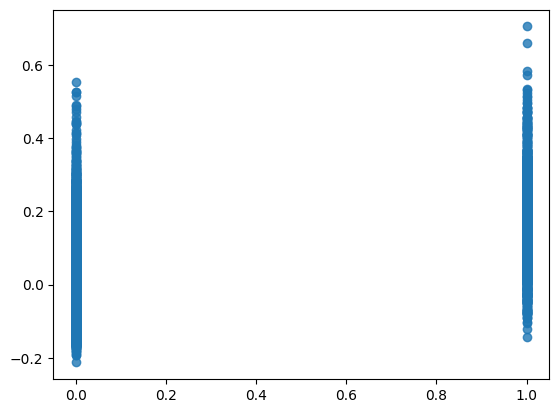

In [39]:
plt.scatter(df.values[:,-1], X_projected, alpha=0.8)

## Logisitic Regression

In [228]:
@dataclass
class LogisticRegression:
#     learningRate : float
#     epsilon : float
#     maxIteration : int

    
    def __init__(self, X, y, learningRate, epsilon, maxIteration):
        self.train_X = X
        self.train_y = y
        self.learningRate = learningRate
        self.epsilon = epsilon
        self.maxIteration = maxIteration
#         self.train_X, self.test_X, self.train_y, self.test_y = self.dataReader()

        
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])  
    
#     def dataReader(self):
#         train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.30)
#         return train_X, test_X, train_y, test_y 
     
#     def remove_index(self, index_1, index_2):
#         X = np.delete(self.train_X, [index_1-1, index_2-1], 0)
#         y = np.delete(self.train_y, [index_1-1, index_2-1], 0)
#         return X, y
    def predict(self, X):
        return X.dot(self.w)
    
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    def costFunction(self, X, y):
        # log loss
#         sig = self.sigmoid(self.predict(X))
#         loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig))
#         cost = -loss.sum()
        
        #second appraoch
        pred = self.predict(X)
        cost = (np.log(np.ones(X.shape[0]) + np.exp(pred)) - pred * y).sum()
        return cost

    def costDervitive(self, X ,y):
        sig = self.sigmoid(self.predict(X))
        grad = (sig - y).dot(X)
        return grad

    def gradientDescent(self, X, y):
        errors = []
        last = float("inf")
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.costDervitive(X, y)
            current = self.costFunction(X, y)
            errors.append(current)
            diff = abs(last - current)
            last = current
            
            if diff < self.epsilon:
                print("The model stopped learning")
                break
          
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        f_score = 2 * precision * recall / (precision + recall)
        return f_score, precision, recall

    def run_model(self):       
#         self.train_X = self.addX0(self.train_X)
#         self.test_X = self.addX0(self.test_X)
        self.w = np.ones([self.train_X.shape[1]], dtype = np.float64)
        self.gradientDescent(self.train_X, self.train_y)
    
        y_hat = self.sigmoid(self.predict(self.train_X))
        y_hat = np.around(y_hat)
        f_score, precision, recall = self.evaluate(self.train_y, y_hat)
        
        print("The f1-Score was {} and \
        Precision was {} and \
        Recall was {}".format(f_score, precision, recall))
    
    def plot(self):
        plt.figure(figsize=(12, 12))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.train_X[:, 0], 
                     self.train_X[:, 1], 
#                      self.train_X[:, 2],
                     self.sigmoid(self.train_X.dot(self.w)), 
                     c = self.train_y[:], cmap='viridis', s=100);

        ax.set_xlim3d(-1, 1)
        ax.set_ylim3d(-1, 1)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

        
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = -1, 1
        y_min, y_max = -1, 1

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10),
                                 np.linspace(y_min, y_max, 10))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))
        ax.contour(xx, yy, probs, levels=[0.2], cmap="Greys", vmin=0, vmax=.6)
        ax.scatter(self.train_X[:, 0], self.train_X[:, 1], 
                   c=self.train_y[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')

#     def plot3D(self):
#         # evenly sampled points
#         x_min, x_max = -20000, 85000
#         y_min, y_max = -2500, 600
        
#         xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10),
#                              np.linspace(y_min, y_max, 100))
        
#         grid = np.c_[xx.ravel(), yy.ravel()]
#         probs = grid.dot(self.w).reshape(xx.shape)
#         fig = plt.figure(figsize=(14,12))
#         ax = plt.axes(projection='3d')
#         ax.contour3D(xx, yy, probs, 50, cmap='binary')

#         ax.scatter3D(self.train_X[:, 0], self.train_X[:, 1], 
#                    c=self.train_y[:], s=50,
#                    cmap="RdBu", vmin=-.2, vmax=1.2,
#                    edgecolor="white", linewidth=1)

#         ax.set_xlabel('x1')
#         ax.set_ylabel('x2')
#         ax.set_zlabel('probs')
#         ax.set_title('3D contour')
#         plt.show()

### Logistic Regression under original data

In [258]:
lX = df.values[:,:-1]
ly = df.values[:,-1]
train_X, test_X, train_y, test_y = train_test_split(lX, ly, test_size = 0.30)
lr = LogisticRegression(train_X, train_y,
                        epsilon  = 1e-10, 
                        learningRate = 1e-2, 
                        maxIteration = 1500)
lr.run_model()

100%|█████████████████████████████████████| 1500/1500 [00:01<00:00, 1150.33it/s]

The f1-Score was 0.20739762219286656 and         Precision was 0.7621359223300971 and         Recall was 0.12003058103975535


In [278]:
lr_pred = lr.sigmoid(lr.predict(train_X))
lr_var = np.var(lr_pred)
print(lr_var)

0.030895395191792012


In [281]:
lr_sse = np.mean((np.mean(lr_pred) - test_y)**2)
print('sse:',lr_sse)
lr_bias = lr_sse - lr_var
print('bias:',lr_bias)

sse: 0.22341141051000835
bias: 0.19251601531821633


### Logistic Regression under PCA data

In [288]:
pca_X = bank_pca.values[:,:-1]
pca_y = bank_pca.values[:,-1]
ptrain_X, ptest_X, ptrain_y, ptest_y = train_test_split(pca_X, pca_y, test_size = 0.30)
plr = LogisticRegression(ptrain_X, ptrain_y,
                         epsilon  = 1e-10, 
                         learningRate = 1e-5, 
                         maxIteration = 1500)
plr.run_model()

100%|█████████████████████████████████████| 1500/1500 [00:01<00:00, 1380.01it/s]

The f1-Score was 0.9632326174008009 and         Precision was 0.9290730337078652 and         Recall was 1.0


In [291]:
p_pred = plr.sigmoid(plr.predict(ptrain_X))
p_var = np.var(p_pred)
print(p_var)

0.12486162428420942


In [293]:
p_sse = np.mean((np.mean(p_pred) - test_y)**2)
print('sse:',p_sse)
p_bias = p_sse - p_var
print('bias:',p_bias)

sse: 0.19889789238289285
bias: 0.07403626809868342


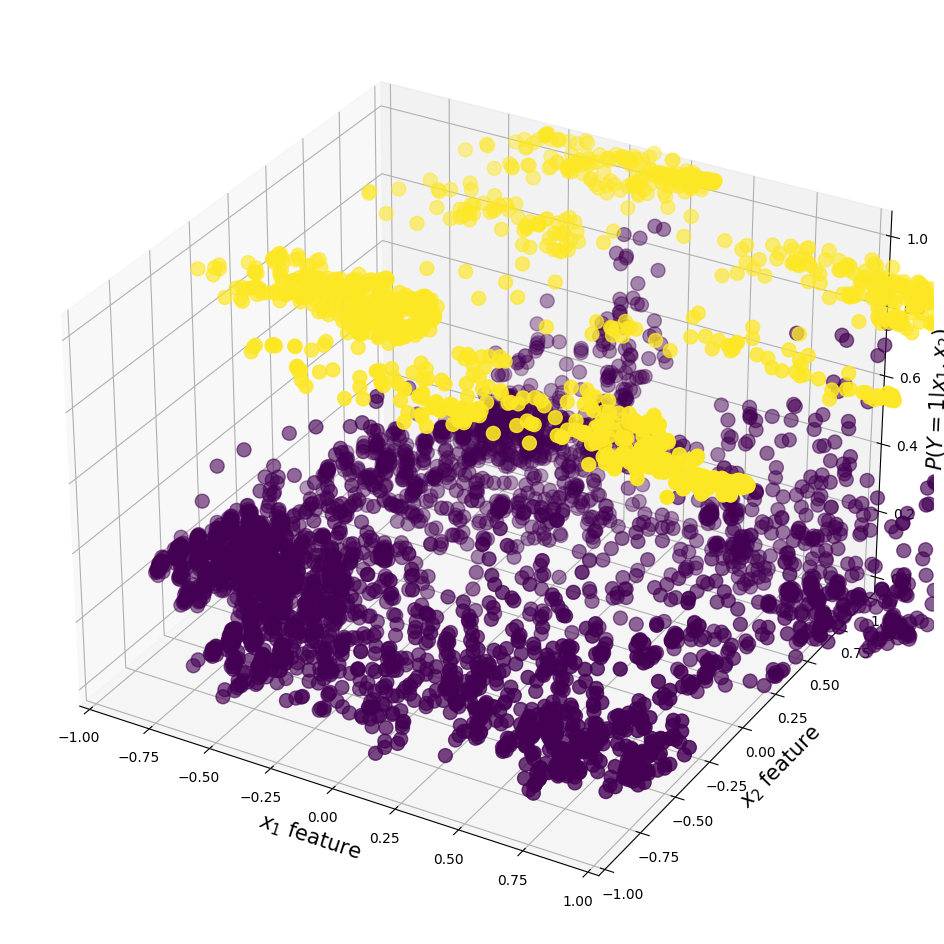

In [295]:
plr.plot()

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1520.43it/s]


The f1-Score was 0.561119293078056 and         Precision was 0.4154852780806979 and         Recall was 0.8639455782312925


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1082.39it/s]


The f1-Score was 0.8042553191489361 and         Precision was 0.6725978647686833 and         Recall was 1.0


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1526.09it/s]


The f1-Score was 0.9152542372881356 and         Precision was 0.84375 and         Recall was 1.0


100%|█████████████████████████████████████| 1500/1500 [00:00<00:00, 1601.89it/s]


The f1-Score was 0.9632326174008009 and         Precision was 0.9290730337078652 and         Recall was 1.0


100%|█████████████████████████████████████| 2000/2000 [00:01<00:00, 1774.57it/s]


The f1-Score was 0.9810901001112347 and         Precision was 0.962882096069869 and         Recall was 1.0


100%|█████████████████████████████████████| 2500/2500 [00:01<00:00, 1633.32it/s]


The f1-Score was 0.9906402096593037 and         Precision was 0.9814540059347181 and         Recall was 1.0


100%|█████████████████████████████████████| 3000/3000 [00:01<00:00, 1605.87it/s]

The f1-Score was 0.9951109439638961 and         Precision was 0.9902694610778443 and         Recall was 1.0


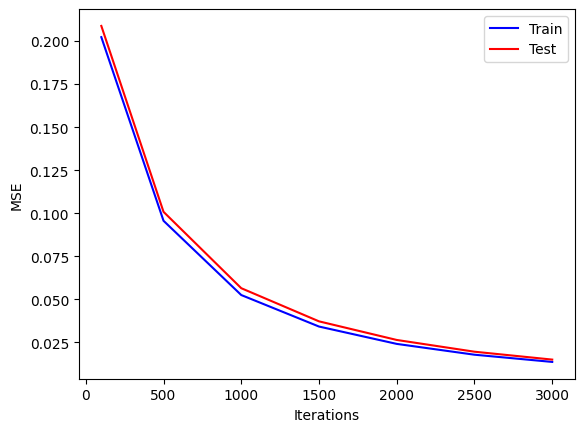

In [356]:
# finding the iteration size
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_test = []
mse_train = []
rates = [100,500,1000,1500,2000,2500,3000]
for i in rates:
    model = LogisticRegression(ptrain_X, ptrain_y, epsilon  = 1e-10, learningRate = 1e-5, maxIteration = i)

    model.run_model()
    Y_pred_train = model.sigmoid(model.predict(ptrain_X))
    Y_pred_test = model.sigmoid(model.predict(ptest_X))
    mse_test.append(mean_squared_error(ptest_y, Y_pred_test))
    mse_train.append(mean_squared_error(ptrain_y, Y_pred_train))

xaxis = rates
# Plot a simple line chart
plt.plot(xaxis, mse_train, 'b', label = "Train")
# Plot another line on the same chart/graph
plt.plot(xaxis, mse_test, 'r', label = "Test")

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend()

### Logistic Regression under LDA data

In [296]:
ldaX = X_projected
lday = df.values[:,-1]
ltrain_X, ltest_X, ltrain_y, ltest_y = train_test_split(ldaX, lday, test_size = 0.30)
llr = LogisticRegression(ltrain_X, ltrain_y,
                        epsilon  = 1e-10, 
                        learningRate = 1e-5, 
                        maxIteration = 1500)
llr.run_model()

100%|█████████████████████████████████████| 1500/1500 [00:01<00:00, 1011.09it/s]

The f1-Score was 0.5826046939714681 and         Precision was 0.42073778664007977 and         Recall was 0.9468960359012715


In [298]:
l_pred = llr.sigmoid(llr.predict(ltrain_X))
l_var = np.var(l_pred)
print(l_var)

0.0049437891139903845


In [299]:
l_sse = np.mean((np.mean(l_pred) - test_y)**2)
print('sse:',l_sse)
l_bias = l_sse - l_var
print('bias:',l_bias)

sse: (0.2613510441727425+0j)
bias: (0.2564072550587521+0j)


## Naive Bayes

In [301]:
class NaiveBayesClassifier():
    def calc_prior(self, features, target):
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
        return self.prior
    
    def calc_statistics(self, features, target):
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []
        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i])
            conditional = np.sum(np.log(self.gaussian_density(i, x)))
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

In [458]:
nX = df.iloc[:,:-1]
ny = df.iloc[:,-1]

In [459]:
X_train, X_test, y_train, y_test = train_test_split(nX, ny, test_size = 0.30)

In [460]:
nbc = NaiveBayesClassifier()
nbc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [461]:
#get predictions
predictions = nbc.predict(X_test)

/var/folders/5m/b1nnfd2916z906z1wgpls23r0000gn/T/ipykernel_41394/1323263178.py:27: RuntimeWarning: divide by zero encountered in log
  conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable


In [462]:
nbc.accuracy(y_test, predictions)

0.7637318255250404

In [463]:
y_test.value_counts(normalize=True)

0    0.76979
1    0.23021
Name: y, dtype: float64

In [464]:
a = pd.DataFrame(predictions)
a.value_counts(normalize=True)

0    0.747577
1    0.252423
dtype: float64

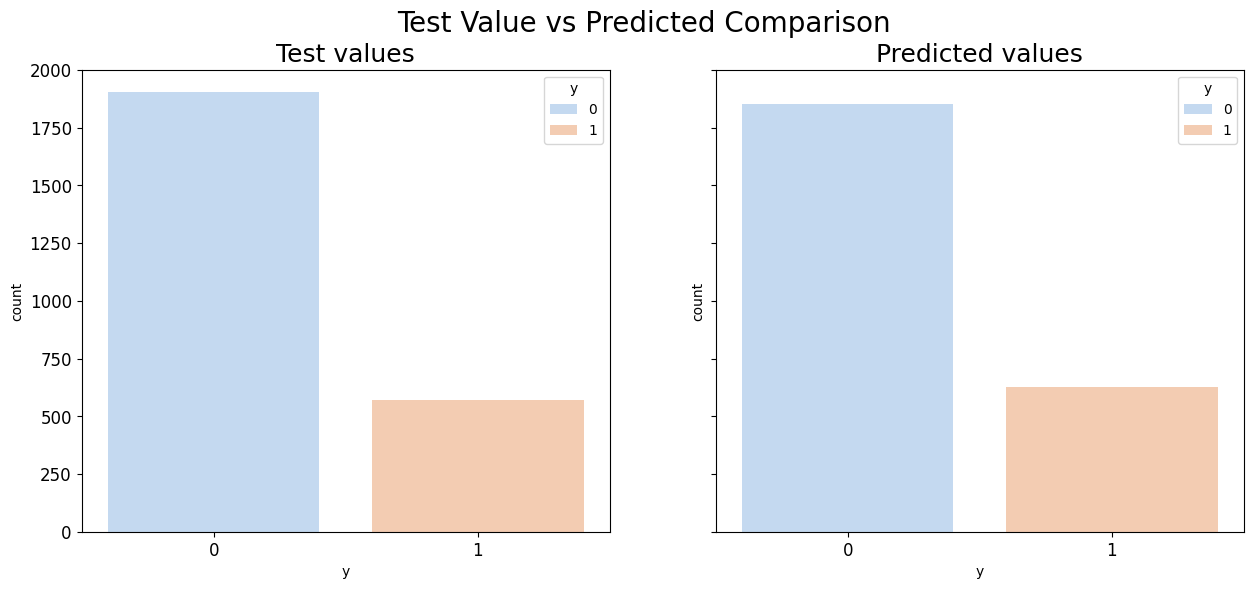

In [465]:
target = 'y'
tr = pd.DataFrame(data=y_test, columns=[target])
pr = pd.DataFrame(data=predictions, columns=[target])
        
        
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
sns.countplot(x=target, data=tr, ax=ax[0], palette='pastel', alpha=0.7, hue=target, dodge=False)
sns.countplot(x=target, data=pr, ax=ax[1], palette='pastel', alpha=0.7, hue=target, dodge=False)
        
fig.suptitle('Test Value vs Predicted Comparison', fontsize=20)

ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[0].set_title("Test values", fontsize=18)
ax[1].set_title("Predicted values", fontsize=18)
plt.show()

In [466]:
npX = bank_pca.iloc[:,:-1]
npy = bank_pca.iloc[:,-1]
X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(npX, npy, test_size = 0.30)

In [467]:
nbc.fit(X_ptrain, y_ptrain)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [468]:
pca_predictions = nbc.predict(X_ptest)

In [469]:
nbc.accuracy(y_ptest, pca_predictions)

0.842891760904685

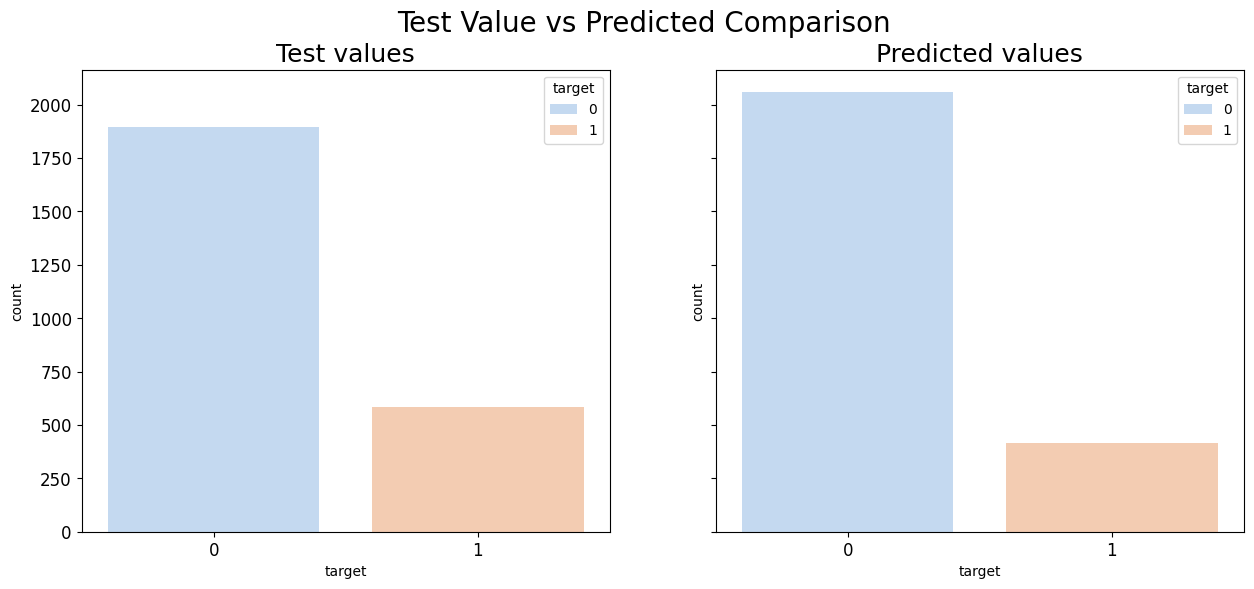

In [471]:
target = 'target'
tr = pd.DataFrame(data=y_ptest, columns=[target])
pr = pd.DataFrame(data=pca_predictions, columns=[target])
        
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
sns.countplot(x=target, data=tr, ax=ax[0], palette='pastel', alpha=0.7, hue=target, dodge=False)
sns.countplot(x=target, data=pr, ax=ax[1], palette='pastel', alpha=0.7, hue=target, dodge=False)
        
fig.suptitle('Test Value vs Predicted Comparison', fontsize=20)

ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[0].set_title("Test values", fontsize=18)
ax[1].set_title("Predicted values", fontsize=18)
plt.show()

## SVM

In [317]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w = self.w- self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

#     clf = SVM()
#     clf.fit(train_X, train_y)
#     predictions = clf.predict(test_X)
# visualize_svm()
# print(clf.w, clf.b)

In [358]:
clf = SVM()
clf.fit(ptrain_X, ptrain_y)
svmpredictions = clf.predict(ptest_X)

In [364]:
print(clf.w, clf.b)

[ 3.84109356e-01  4.52074233e-02  7.63046190e-01 -5.90257209e-01
 -4.06114322e-01  8.42354652e-01 -1.59371718e-01  3.81984265e-01
 -6.41409924e-02  2.79144214e-01 -3.76039532e-01 -2.48387604e-01
 -4.84528196e-02  5.59659216e-01  1.13606605e+00 -1.84923223e-01
  1.08708354e-01  1.28984741e-01  8.69826943e-02 -1.73977568e-01
  9.58272247e-02 -2.08039279e-02 -4.20774878e-02 -8.07153253e-02
 -9.68767205e-04 -6.96656114e-02  7.68877774e-02 -2.15289404e-02
 -4.34876890e-02 -2.29443291e-02] 0.5670000000000004


In [372]:
predictions_table = pd.DataFrame(svmpredictions, columns=['target'])
new = []
for i in range(len(predictions_table)):
    if predictions_table.target[i] < 0:
        i = 0
    else:
        i = 1
    new.append(i)
# predictions_table = pd.DataFrame(new, columns=['target'])

In [375]:
svm_accuracy = np.sum(ptest_y == new) / len(ptest_y)
svm_accuracy

1.0

In [378]:
pd.DataFrame(ptest_y).value_counts(normalize=True)

0.0    0.765751
1.0    0.234249
dtype: float64

In [381]:
pd.DataFrame(svmpredictions).value_counts(normalize=True)

-1.0    0.765751
 1.0    0.234249
dtype: float64